## Import


In [1]:
import pandas as pd
import numpy as np
import re
import string
import warnings
from numpy import mean
warnings.filterwarnings("ignore")
import sklearn.metrics as skm
import math
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import time
import nltk
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.wordnet import WordNetLemmatizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

## Store the Dataset into the Dataframe

In [2]:
encoding = "ISO-8859-1"
columns =['Sentiment', 'ID', 'Date', 'Flag', 'User', 'Text']
df = pd.read_csv("sentiment.csv", encoding = encoding , names = columns)
df = df[['Sentiment','Text']]
df['Sentiment'] = df['Sentiment'].replace(4,1)

In [3]:
# df.to_csv(r'C:\Users\kashi\ML Sentimental Analysis\Sentimental.csv')

## Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [5]:
df.shape

(1600000, 2)

In [6]:
df.head()

,Sentiment,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Data Pre-Processing

### Duplicate Data

In [7]:
df = df.sort_values('Text')
df.reset_index(inplace = True, drop = True)
df[df[['Text']].duplicated(keep=False)]

,Sentiment,Text
221,0,David must be hospitalized for five days end...
222,0,David must be hospitalized for five days end...
327,1,bathroom is clean..... now on to more enjoya...
328,1,bathroom is clean..... now on to more enjoya...
467,0,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #...
...,...,...
1599195,0,"zofran is not making this work day any easier,..."
1599385,0,~ get SUICIDE !!
1599386,0,~ get SUICIDE !!
1599476,1,~~~X0X0~~~!!!X0X0!!! I love you!!! &amp;...


In [8]:
initial = df.shape[0]
df.drop_duplicates('Text',keep='first', inplace=True)
df.reset_index(inplace = True, drop = True)
after = df.shape[0]

print("Initial Row Size",initial)
print("After Dropping",after)
print("Rows Deleted",(initial-after))

Initial Row Size 1600000
After Dropping 1581466
Rows Deleted 18534


## Null Values

In [9]:
df.isna().sum().to_frame(name='Null Values')

,Null Values
Sentiment,0
Text,0


In [10]:
initial = df.shape[0]
df = df.dropna()
after = df.shape[0]

print("Initial Row Size",initial)
print("After Deletion",after)
print("Rows Deleted",(initial-after))

Initial Row Size 1581466
After Deletion 1581466
Rows Deleted 0


## Text Pre-Processing



In [11]:
df.head()

,Sentiment,Text
0,0,exh...
1,0,I miss he...
2,0,is so sad for my APL frie...
3,0,I missed the New Moon trail...
4,0,I HAVE NOOOOOOOOOO FRIENDS ON T...


### Stop Words

In [12]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
print(stop)

{'most', 'he', 'what', 'once', 'weren', 'them', 'can', 'i', 'below', 'very', "shan't", 'those', 'has', 'again', 'doesn', 'needn', 'wasn', 'your', 't', "you've", 'so', 'any', 'being', 'into', "needn't", 'because', 'hers', 'from', 'on', 'will', "wasn't", "wouldn't", "weren't", "isn't", 'you', 'while', 'haven', 'than', 'was', 'myself', 'themselves', 'just', 'such', 'herself', 'does', 'before', 'ain', 'these', 'the', 'here', 'out', "don't", 's', 'me', 'now', 'against', 'mightn', "you'd", 'how', 'doing', 'been', 'their', 'as', 'do', 'shouldn', 've', 'own', 'couldn', 'are', 'at', 'her', 'it', 'a', "should've", 'nor', 'isn', 'won', 'its', 'yourselves', 'am', "mustn't", 'some', "mightn't", 'yourself', 'ma', 'should', 'yours', 'she', 'no', 'hasn', 'further', 'during', "shouldn't", 'is', 'that', "couldn't", 'be', 'didn', 'this', 'not', 'my', 'off', 'if', 'for', 'between', 'wouldn', 'down', 'his', 'shan', 'ours', 'both', 'more', 'other', 'mustn', "you'll", 'had', 'until', 'hadn', 'have', 'd', "yo

Stop words like "no", "not", "don't" can change the meaning of the sentence and hence should not be dropped.


In [14]:
negative_stop = []
for i in stop:
    if "no" in i:
        negative_stop.append(str(i))
    if "n't" in i:
        negative_stop.append(str(i))

negative = set(negative_stop)

In [15]:
print(negative)

{"shouldn't", "won't", "couldn't", "hadn't", "shan't", 'not', "needn't", "wasn't", "didn't", "wouldn't", "weren't", "isn't", 'nor', "haven't", "mustn't", "mightn't", "doesn't", "aren't", "don't", 'no', 'now', "hasn't"}


In [16]:
stopwords = stop - negative
stopwords = stop
print(stopwords)

{'most', 'he', 'what', 'once', 'weren', 'them', 'can', 'i', 'below', 'very', "shan't", 'those', 'has', 'again', 'doesn', 'needn', 'wasn', 'your', 't', "you've", 'so', 'any', 'being', 'into', "needn't", 'because', 'hers', 'from', 'on', 'will', "wasn't", "wouldn't", "weren't", "isn't", 'you', 'while', 'haven', 'than', 'was', 'myself', 'themselves', 'just', 'such', 'herself', 'does', 'before', 'ain', 'these', 'the', 'here', 'out', "don't", 's', 'me', 'now', 'against', 'mightn', "you'd", 'how', 'doing', 'been', 'their', 'as', 'do', 'shouldn', 've', 'own', 'couldn', 'are', 'at', 'her', 'it', 'a', "should've", 'nor', 'isn', 'won', 'its', 'yourselves', 'am', "mustn't", 'some', "mightn't", 'yourself', 'ma', 'should', 'yours', 'she', 'no', 'hasn', 'further', 'during', "shouldn't", 'is', 'that', "couldn't", 'be', 'didn', 'this', 'not', 'my', 'off', 'if', 'for', 'between', 'wouldn', 'down', 'his', 'shan', 'ours', 'both', 'more', 'other', 'mustn', "you'll", 'had', 'until', 'hadn', 'have', 'd', "yo

These remaining stopwords are not important for our data and should be removed.

### Stemming


In [17]:
from nltk.stem import SnowballStemmer
snow = nltk.stem.SnowballStemmer('english')
print("rocks :", snow.stem("rocks"))
print("corpora :", snow.stem("corpora"))

rocks : rock
corpora : corpora


### Text Filtering

In [18]:
def cleanhtml(rev):
    tag = re.compile('<.*?>https?://\S+|www\.\S+')
    clean = re.sub(tag,'',rev) # '' is used to replace with.
    return clean

In [19]:
def cleanpunc(rev):
    tagg = re.compile('[?|!|\'|\"|#|.|,|(|)|\|\/]')
#     tagg = re.compile('[?|!|@|\'|\"|#|.|,|(|)|\|\/|_|-|&|$|%|^|+|=|<|>|:|;]')[?|!|\'|\"|#|.|,|(|)|\|\/]
    clean = re.sub(tagg,'',rev)
    return clean

In [20]:
i=0
strl = ''
final_string = []
all_pos_words = [] # store words with positive reviews
all_neg_words = [] # store words with negative reviews
s = ''
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"
userPattern       = '@[^\s]+'

In [21]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [22]:
sentence = []
for sent in df['Text'].values:
    sentence.append(sent)
    filtered_sentence = []
    sent = cleanhtml(sent)
    sent = re.sub(userPattern,'', sent)
    sent = re.sub(sequencePattern, seqReplacePattern, sent)
    for emoji in emojis.keys():
            sent = sent.replace(emoji, "EMOJI" + emojis[emoji])
    for w in sent.split():
        cleaned_words = cleanpunc(w)
        if ((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
            if (cleaned_words.lower() not in stopwords):
                stemmed = (snow.stem(cleaned_words.lower())).encode('UTF-8')
                filtered_sentence.append(stemmed)
            else:
                continue
        else:
            continue
    strl = b" ".join(filtered_sentence)
    final_string.append(strl)
    i+=1

In [23]:
len(final_string)

1581466

In [24]:
# final_string

In [25]:
df['Filtered_Review'] = final_string
df.head()

,Sentiment,Text,Filtered_Review
0,0,exh...,b'exhaust'
1,0,I miss he...,b'miss much alreadi'
2,0,is so sad for my APL frie...,b'sad apl friend'
3,0,I missed the New Moon trail...,b'miss new moon trailer'
4,0,I HAVE NOOOOOOOOOO FRIENDS ON T...,b'noo friend twitter make sad someon follow'


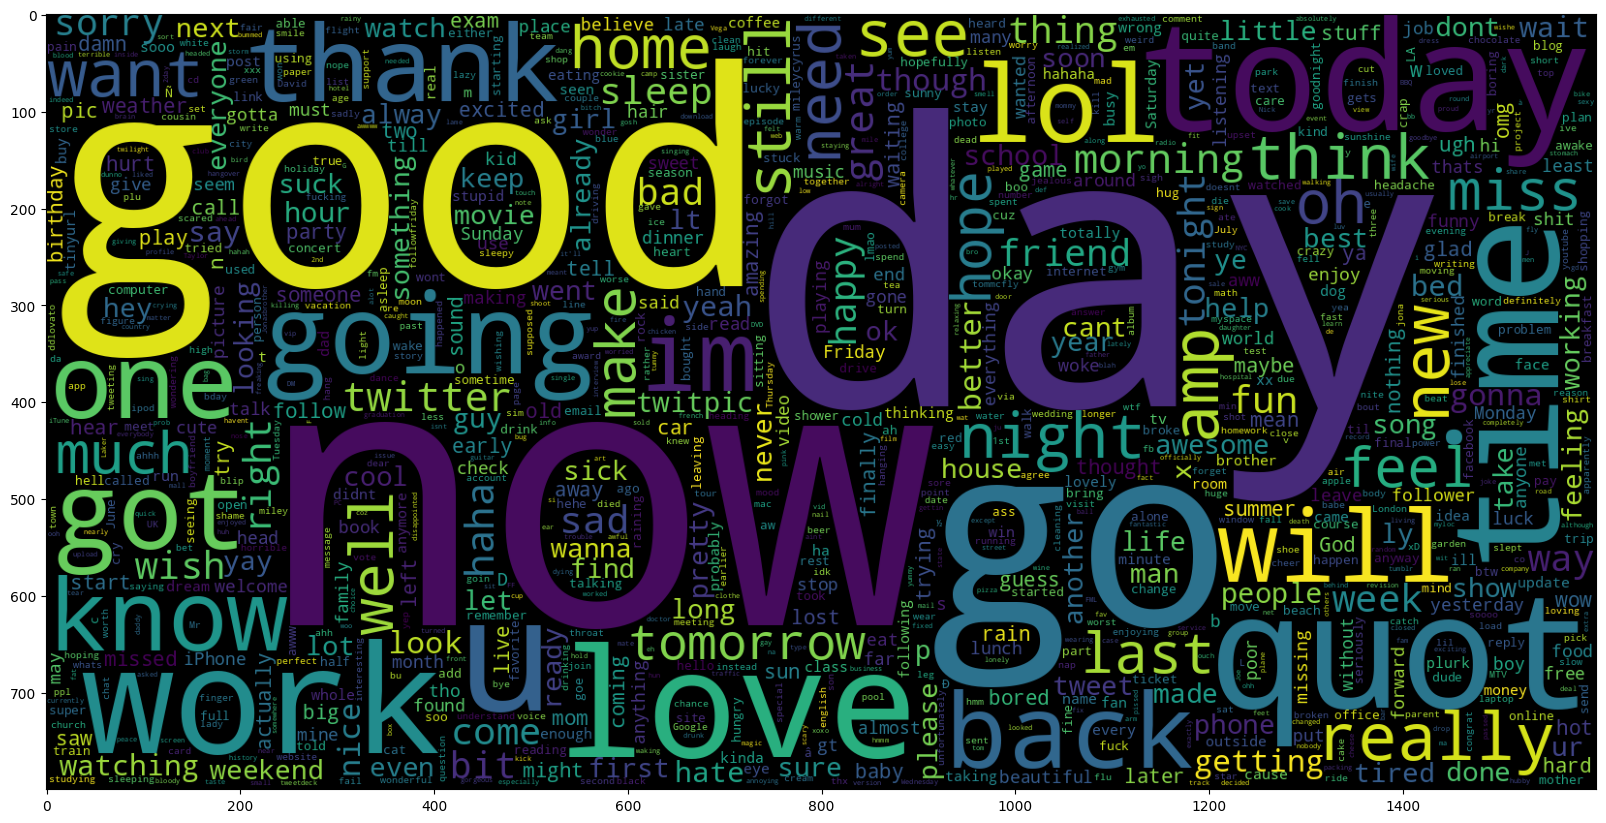

In [26]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(sentence))
plt.imshow(wc)

## Data Splitting

### Train-Test Split

In [27]:
y = df.Sentiment
X = df.Filtered_Review

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = y,
                                                    test_size=0.3, random_state=42)

In [28]:
X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [29]:
X_train = X_train.to_frame()
X_test = X_test.to_frame()
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [30]:
Train = pd.concat([X_train,y_train], axis=1)

In [31]:
print("TRAIN SIZE")
print("Train Data:",Train.shape)
print("X-Train:",X_train.shape)
print("Y-Train:",y_train.shape[0])

TRAIN SIZE
Train Data: (1107026, 2)
X-Train: (1107026, 1)
Y-Train: 1107026


In [32]:
Test = pd.concat([X_test,y_test], axis=1)

In [33]:
print("TEST SIZE")
print("Test Data:",Test.shape)
print("X-Train:",X_test.shape)
print("Y-Train:",y_test.shape[0])

TEST SIZE
Test Data: (474440, 2)
X-Train: (474440, 1)
Y-Train: 474440


## Data Balancing

In [34]:
Train.Sentiment.value_counts()

1    554664
0    552362
Name: Sentiment, dtype: int64

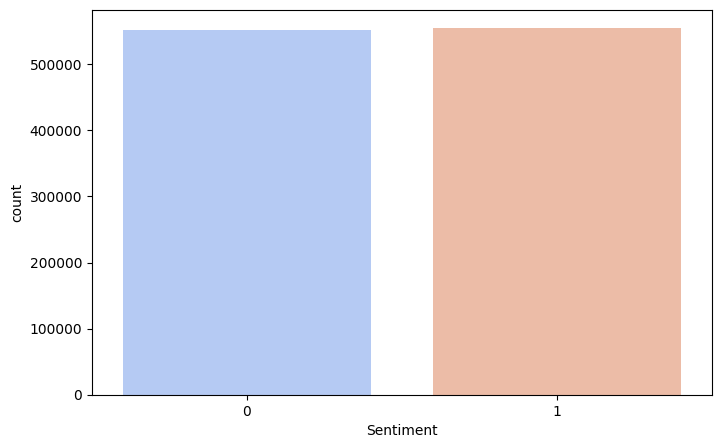

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Sentiment', data = Train, palette = "coolwarm")
plt.show()

As we can see the data is already balanced, so there is no need of undersampling or oversampling the data.


In [36]:
print("Before OverSampling:")
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {}'.format(y_train.shape))
print(y_train.value_counts())

X_train_res = X_train
y_train_res = y_train

print("\n\nAfter OverSampling:")
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print(y_train_res.value_counts())

Before OverSampling:
Before OverSampling, the shape of train_X: (1107026, 1)
Before OverSampling, the shape of train_y: (1107026, 1)
Sentiment
1            554664
0            552362
dtype: int64


After OverSampling:
After OverSampling, the shape of train_X: (1107026, 1)
After OverSampling, the shape of train_y: (1107026, 1) 

Sentiment
1            554664
0            552362
dtype: int64


In [37]:
Train_resampled = X_train_res.merge(y_train_res, left_index=True, right_index=True)
Train_resampled.shape

(1107026, 2)

### Train - Cross Validation Split

In [38]:
y = y_train_res.Sentiment
X = X_train_res.Filtered_Review

X_resampled, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.30)

In [39]:
X_resampled = X_resampled.to_frame()
X_cv = X_cv.to_frame()
y_train = y_train.to_frame()
y_cv = y_cv.to_frame()

In [40]:
print("TRAIN SIZE")
print("X-Train:",X_resampled.shape)
print("Y-Train:",y_train.shape[0])

TRAIN SIZE
X-Train: (774918, 1)
Y-Train: 774918


In [41]:
print("CV SIZE")
print("X-CV:",X_cv.shape)
print("Y-CV:",y_cv.shape[0])

CV SIZE
X-CV: (332108, 1)
Y-CV: 332108


## Vectorization

### tf-idf

In [42]:
tfidf_vectorizer = TfidfVectorizer(max_features=200000)
tfidf_vectorizer.fit(X_train_res['Filtered_Review'])

tfidf_X_train = tfidf_vectorizer.transform(X_resampled['Filtered_Review'])
tfidf_X_cv = tfidf_vectorizer.transform(X_cv['Filtered_Review'])
tfidf_X_test = tfidf_vectorizer.transform(X_test['Filtered_Review'])

## Label Encoding

In [43]:
# labelEncoder = LabelEncoder()

# y_train = labelEncoder.fit_transform(y_train)
# y_cv = labelEncoder.transform(y_cv)
# y_test = labelEncoder.transform(y_test)

# labels = labelEncoder.classes_.tolist()
# print(labels)

## Model Training

In [44]:
Algorithm = []
R2_Score = []
R2_Score_cv = []

In [45]:
def model_training(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
#     model_Evaluate(model)
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)
    Algorithm.append(name)
    R2_Score.append(accuracy_score(y_train, y_preds_train))
    R2_Score_cv.append(accuracy_score(y_test, y_preds_test))

In [46]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model_training(model, X_train, y_train, X_test, y_test, name)

### 1) BernoulliNB

In [47]:
BNB = BernoulliNB(alpha = 2)
evaluate_model(model = BNB,
                       X_train = tfidf_X_train,
                       y_train = y_train,
                       X_test = tfidf_X_cv,
                       y_test = y_cv,
                       name = 'BernoulliNB')

### 2) XGBoost

In [48]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.75, max_delta_step=0,
              max_depth=10, min_child_weight=3,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

evaluate_model(model = XGB,
                       X_train = tfidf_X_train,
                       y_train = y_train,
                       X_test = tfidf_X_cv,
                       y_test = y_cv,
                       name = 'XG-Boost')

### 3) Logestic Regression

In [49]:
Log = LogisticRegression(C = 1, max_iter=500, random_state=1, penalty = 'l2', solver = 'liblinear')
evaluate_model(model = Log,
                       X_train = tfidf_X_train,
                       y_train = y_train,
                       X_test = tfidf_X_cv,
                       y_test = y_cv,
                       name = 'Logestic Regression')

### 4) Ridge Classification

In [50]:
Rid = RidgeClassifier(alpha = 15)

model_training(model = Rid,
                       X_train = tfidf_X_train,
                       y_train = y_train,
                       X_test = tfidf_X_cv,
                       y_test = y_cv,
                       name = 'Ridge Classifier')

## Comparison Table

In [51]:
comp = pd.DataFrame(list(zip(Algorithm, R2_Score, R2_Score_cv)), columns =['Algorithm', 'R2_Score', 'R2_Score_cv'])
comp.sort_values(by = 'R2_Score_cv', ascending = False, inplace = True)
comp.reset_index(inplace = True, drop = True)
comp.head()

,Algorithm,R2_Score,R2_Score_cv
0,Logestic Regression,0.797428,0.774591
1,Ridge Classifier,0.784473,0.771716
2,XG-Boost,0.803362,0.771695
3,BernoulliNB,0.789758,0.767765


## Test Data


In [52]:
def MAE(y_predicted, y_actual):

    abs_error = np.abs(y_predicted - y_actual)
    sum_abs_error = np.sum(abs_error)
    mae = sum_abs_error / y_actual.size

    return mae

In [53]:
def model_testing(model, X_train, y_train, X_test, y_test, name):
#     model.fit(X_train, y_train)
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)
    print("Algorithm Used :",name)
    print('\n')
    print(classification_report(y_test, y_preds_test))
    print('\n')
    scikitplot.metrics.plot_confusion_matrix(y_test, y_preds_test, figsize=(10,10))

Algorithm Used : Logestic Regression tf-idf


              precision    recall  f1-score   support

           0       0.79      0.76      0.77    236727
           1       0.77      0.79      0.78    237713

    accuracy                           0.78    474440
   macro avg       0.78      0.78      0.77    474440
weighted avg       0.78      0.78      0.78    474440





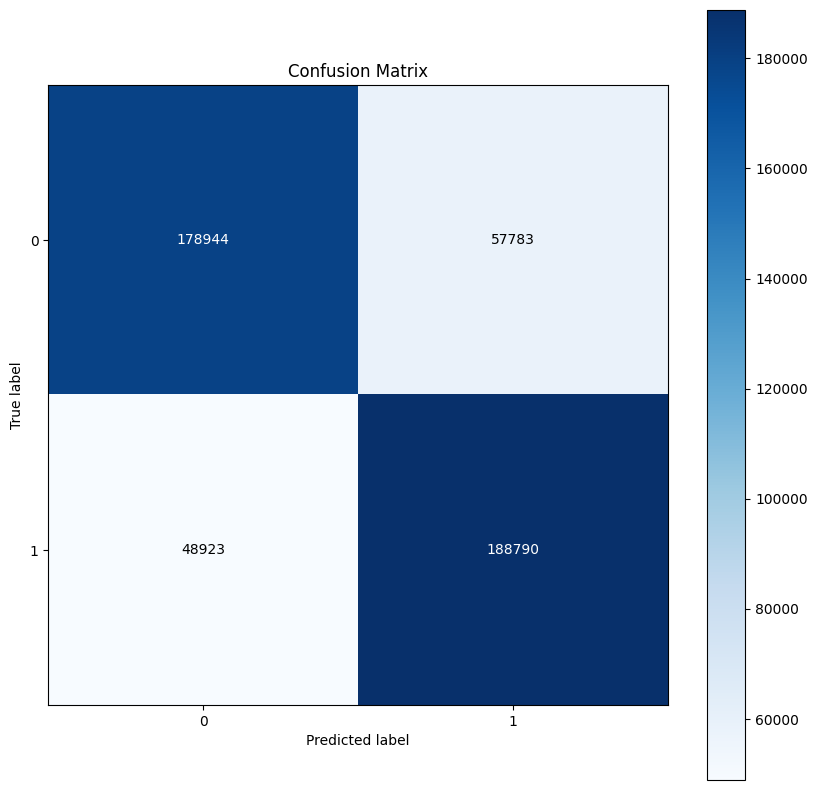

In [57]:
# !pip install scikit-plot
import scikitplot
model_testing(model = Log,
                   X_train = tfidf_X_train,
                   y_train = y_train,
                   X_test = tfidf_X_test,
                   y_test = y_test,
                   name = 'Logestic Regression tf-idf')